### Importação dos dados



In [326]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [327]:
# Lista de DataFrames e nomes das lojas
lojas_df = [loja, loja2, loja3, loja4]
nomes_lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

# Calculando o faturamento total de cada loja
faturamento_por_loja = {}
for i, df in enumerate(lojas_df):
  faturamento_por_loja[nomes_lojas[i]] = df["Preço"].sum()

# Criando o DataFrame de faturamento total
faturamento_total_df = pd.DataFrame(list(faturamento_por_loja.items()), columns=["Loja", "Faturamento"])

# Cálculo da média de faturamento
media_faturamento = faturamento_total_df["Faturamento"].mean()

# Exibindo o DataFrame de faturamento total
display(faturamento_total_df)

,Loja,Faturamento
0,Loja 1,1534509.12
1,Loja 2,1488459.06
2,Loja 3,1464025.03
3,Loja 4,1384497.58


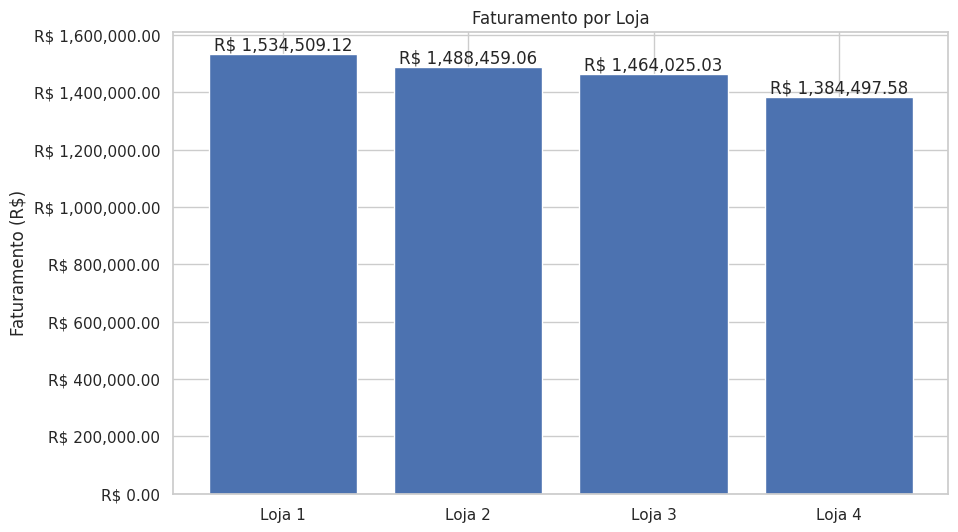

In [328]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(faturamento_total_df["Loja"], faturamento_total_df["Faturamento"])

# Adicionando rótulos e título
plt.ylabel("Faturamento (R$)")
plt.title("Faturamento por Loja")

# Formatando o eixo y para exibir em moeda
formatar = mticker.StrMethodFormatter('R$ {x:,.2f}')
plt.gca().yaxis.set_major_formatter(formatar)


# Adicionando os valores exatos nas barras
for i, row in faturamento_total_df.iterrows():
    plt.text(i, row["Faturamento"], f'R$ {row["Faturamento"]:,.2f}', ha='center', va='bottom')

# Exibindo o gráfico
plt.show()

# 2. Vendas por Categoria


In [329]:
def calcular_vendas_por_categoria(dataframe):
  #Calcula o número de vendas por categoria em um DataFrame de loja.
  contagem_vendas = dataframe['Categoria do Produto'].value_counts().to_dict()
  contagem_vendas_ordenadas = dict(sorted(contagem_vendas.items(), key=lambda item: item[1], reverse=True))
  return contagem_vendas_ordenadas

vendas_loja1 = calcular_vendas_por_categoria(loja)
vendas_loja2 = calcular_vendas_por_categoria(loja2)
vendas_loja3 = calcular_vendas_por_categoria(loja3)
vendas_loja4 = calcular_vendas_por_categoria(loja4)

# Exibindo os resultados para cada loja
print("Contagem de Vendas por Categoria - Loja 1:")
print(vendas_loja1)
print("\nContagem de Vendas por Categoria - Loja 2:")
print(vendas_loja2)
print("\nContagem de Vendas por Categoria - Loja 3:")
print(vendas_loja3)
print("\nContagem de Vendas por Categoria - Loja 4:")
print(vendas_loja4)

Contagem de Vendas por Categoria - Loja 1:
{'moveis': 465, 'eletronicos': 448, 'brinquedos': 324, 'eletrodomesticos': 312, 'esporte e lazer': 284, 'instrumentos musicais': 182, 'livros': 173, 'utilidades domesticas': 171}

Contagem de Vendas por Categoria - Loja 2:
{'moveis': 442, 'eletronicos': 422, 'brinquedos': 313, 'eletrodomesticos': 305, 'esporte e lazer': 275, 'instrumentos musicais': 224, 'livros': 197, 'utilidades domesticas': 181}

Contagem de Vendas por Categoria - Loja 3:
{'moveis': 499, 'eletronicos': 451, 'brinquedos': 315, 'eletrodomesticos': 278, 'esporte e lazer': 277, 'livros': 185, 'instrumentos musicais': 177, 'utilidades domesticas': 177}

Contagem de Vendas por Categoria - Loja 4:
{'moveis': 480, 'eletronicos': 451, 'brinquedos': 338, 'esporte e lazer': 277, 'eletrodomesticos': 254, 'utilidades domesticas': 201, 'livros': 187, 'instrumentos musicais': 170}


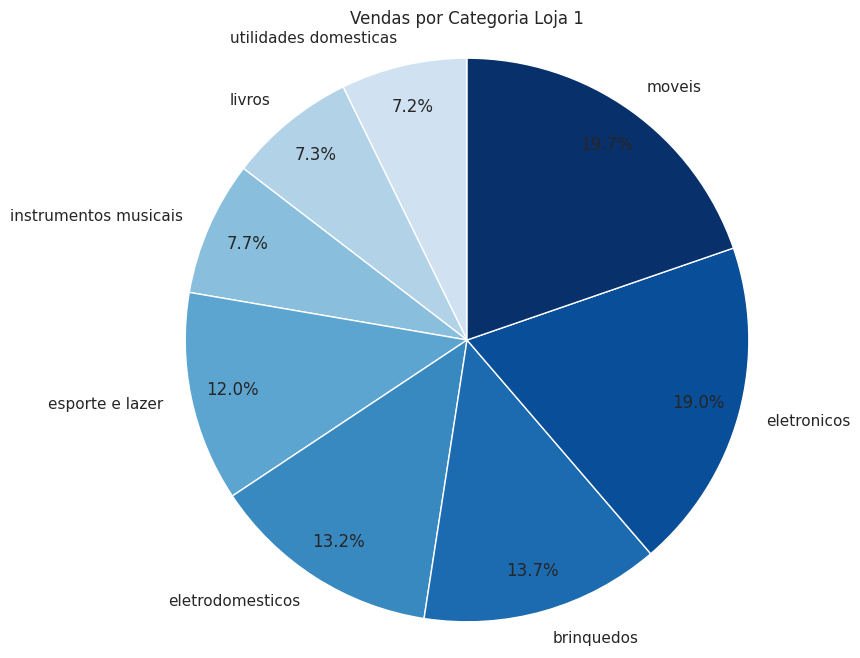

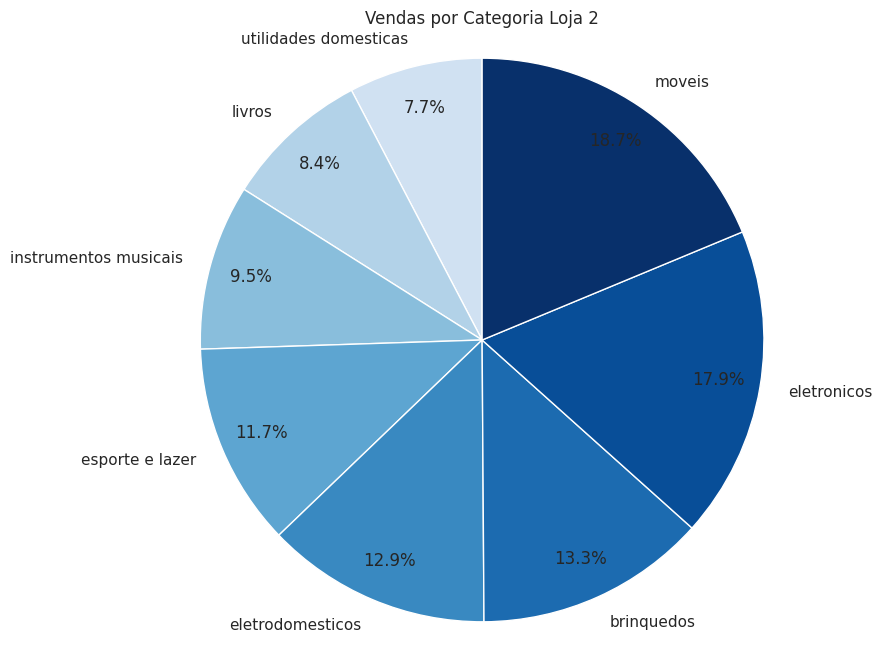

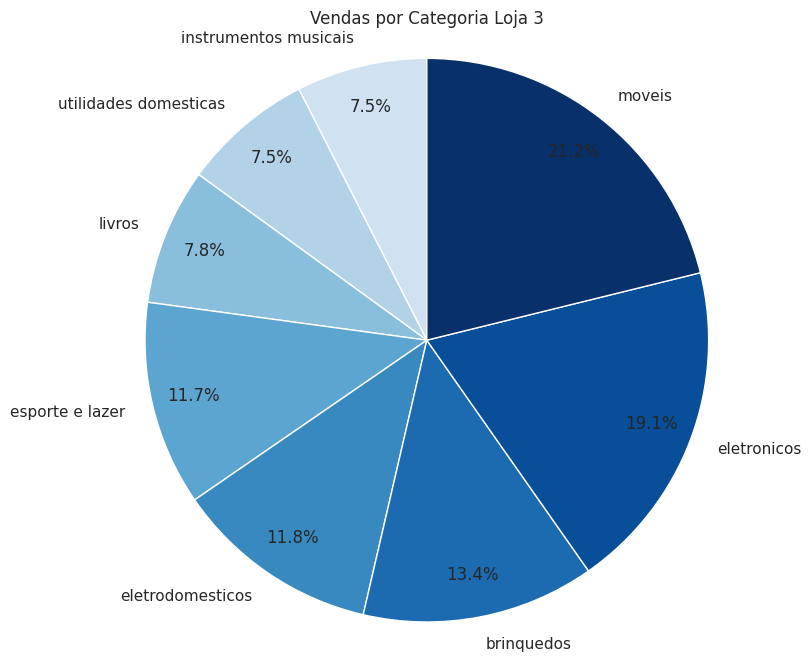

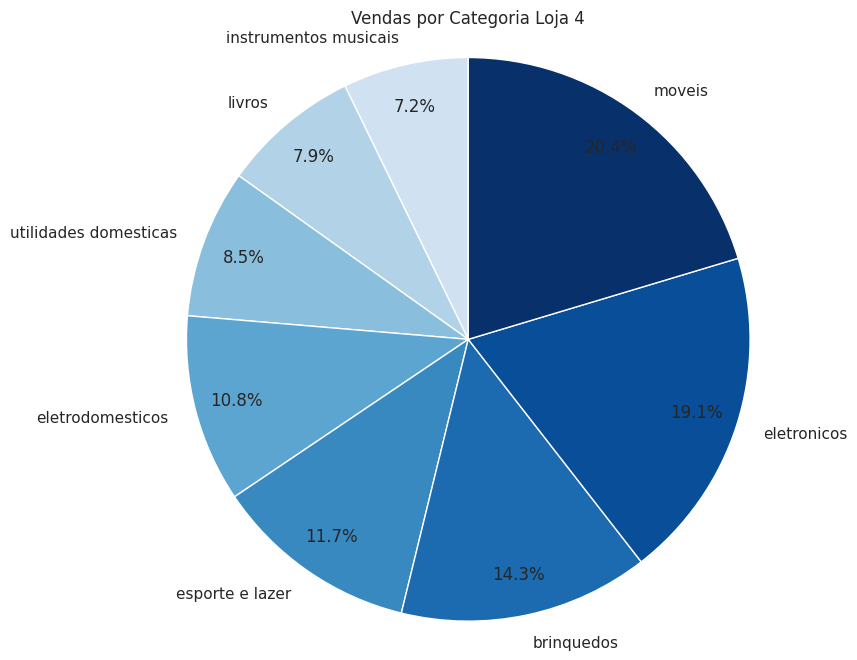

In [330]:
import matplotlib.cm as cm

def vendas_categoria_grafico(categoria, loja):
  # Convertendo o dicionário para uma Series para facilitar a ordenação
  categoria_series = pd.Series(categoria)

  # Ordenando os dados para aplicar o colormap corretamente
  categoria_series = categoria_series.sort_values()

  # Definindo o colormap e normalizando os dados para as cores
  colors = cm.Blues(np.linspace(0.2, 1, len(categoria_series))) # Utiliza o colormap Blues

  plt.figure(figsize=(8, 8))
  plt.pie(categoria_series.values, labels= categoria_series.index, autopct='%1.1f%%', startangle=90, colors=colors, pctdistance=0.85) # pctdistance ajusta a posição dos rótulos de %
  plt.title(f'Vendas por Categoria {loja}')
  plt.axis('equal')  # Garante que o gráfico de pizza seja circular
  plt.show()

vendas_categoria_grafico(resultado_loja, 'Loja 1')
print('\n')
vendas_categoria_grafico(resultado_loja2, 'Loja 2')
print('\n')
vendas_categoria_grafico(resultado_loja3, 'Loja 3')
print('\n')
vendas_categoria_grafico(resultado_loja4, 'Loja 4')

# 3. Média de Avaliação das Lojas

In [331]:
# Lista de DataFrames das lojas
lojas_df = [loja, loja2, loja3, loja4]
nomes_lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

# Calculando a média de avaliação para cada loja
media_avaliacoes_por_loja = {}
for i, df in enumerate(lojas_df):
  media_avaliacoes_por_loja[nomes_lojas[i]] = round(df['Avaliação da compra'].mean(), 2)

# Calculando a média geral de avaliações
media_geral_avaliacoes = round(sum(media_avaliacoes_por_loja.values()) / len(media_avaliacoes_por_loja), 2)


# Exibindo as médias de avaliação por loja e a média geral
print("Média de Avaliação por Loja:")
# Formatando a saída do dicionário
print("{", end="")
for i, (loja, media) in enumerate(media_avaliacoes_por_loja.items()):
    print(f"'{loja}': {media}", end="")
    if i < len(media_avaliacoes_por_loja) - 1:
        print(", ", end="")
print("}")

print("\nMédia Geral de Avaliações:")
print(media_geral_avaliacoes)

Média de Avaliação por Loja:
{'Loja 1': 3.98, 'Loja 2': 4.04, 'Loja 3': 4.05, 'Loja 4': 4.0}

Média Geral de Avaliações:
4.02


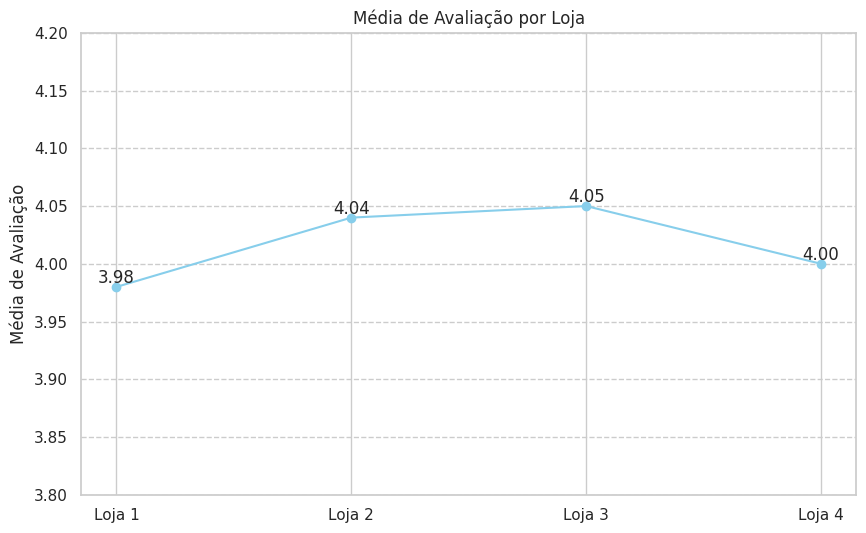

In [332]:
# Criando o gráfico de pontos para as médias de avaliação
lojas = list(media_avaliacoes_por_loja.keys())
avaliacoes_medias = list(media_avaliacoes_por_loja.values())

plt.figure(figsize=(10, 6))
plt.plot(lojas, avaliacoes_medias, marker='o', linestyle='-', color='skyblue')

# Adicionando rótulos e título
plt.ylabel("Média de Avaliação")
plt.title("Média de Avaliação por Loja")
plt.ylim(3.8, 4.2) # Ajustando o limite do eixo y para focar em valores próximos a 4
plt.grid(axis='y', linestyle='--') # Adiciona grades no eixo y

# Adicionando os valores exatos nos pontos
for i, media in enumerate(avaliacoes_medias):
    plt.text(i, media, f'{media:.2f}', ha='center', va='bottom')

# Exibindo o gráfico
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [333]:
# Lista de DataFrames das lojas
lojas_df = [loja, loja2, loja3, loja4]
nomes_lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

In [334]:
def produtos_mais_menos_vendidos(loja):
    contagem_produtos = loja['Produto'].value_counts()

    top_mais = contagem_produtos.head(5)
    top_menos = contagem_produtos.tail(5)
    return top_mais, top_menos

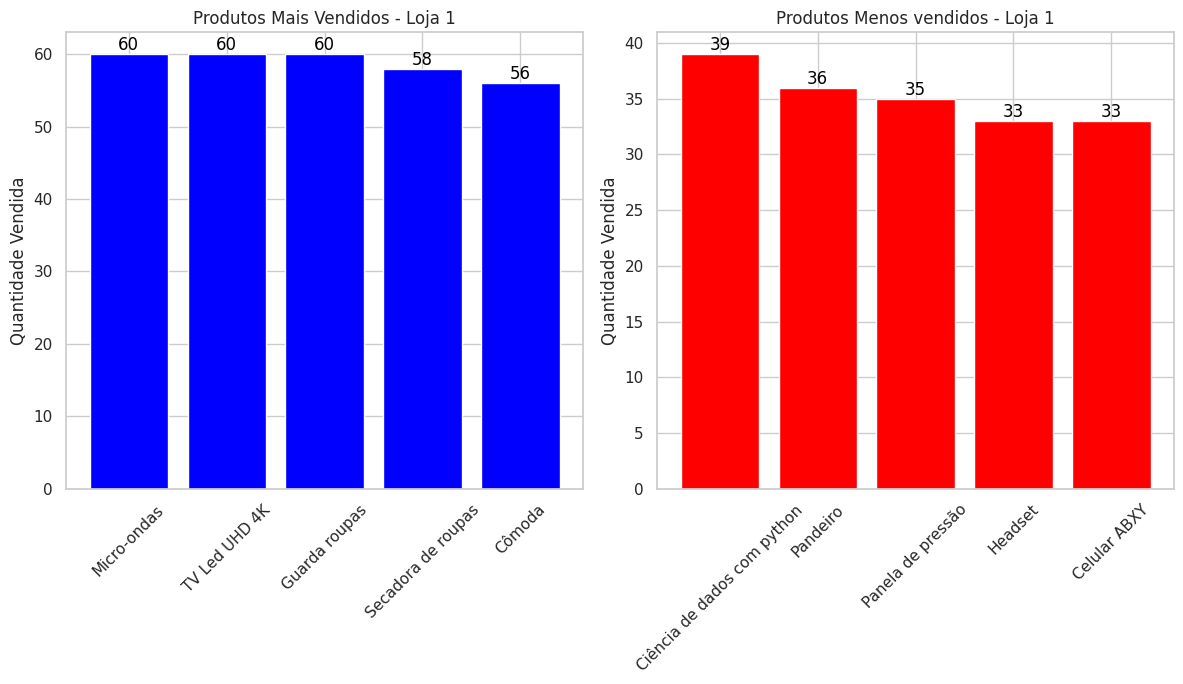

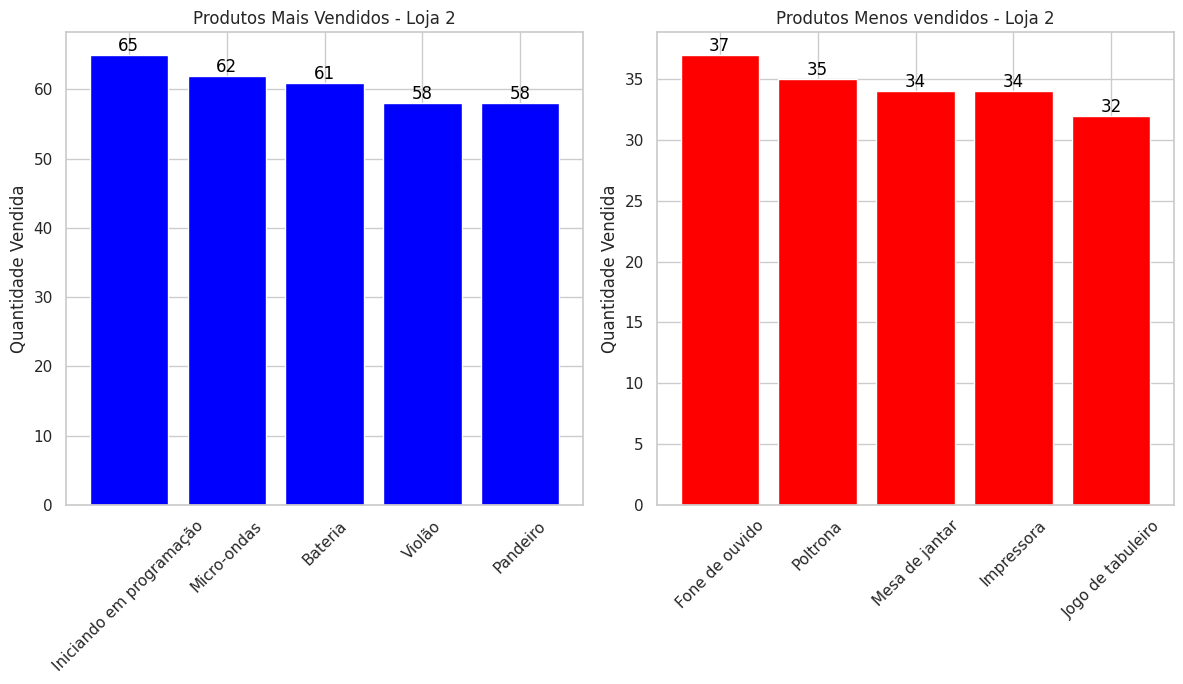

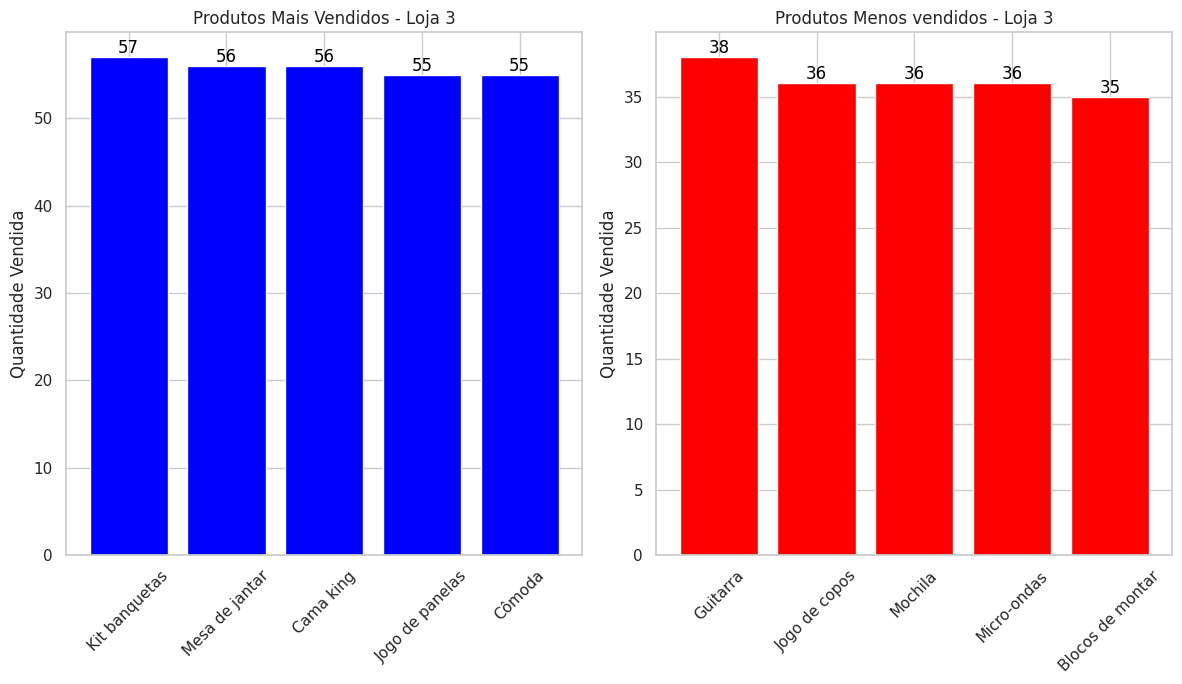

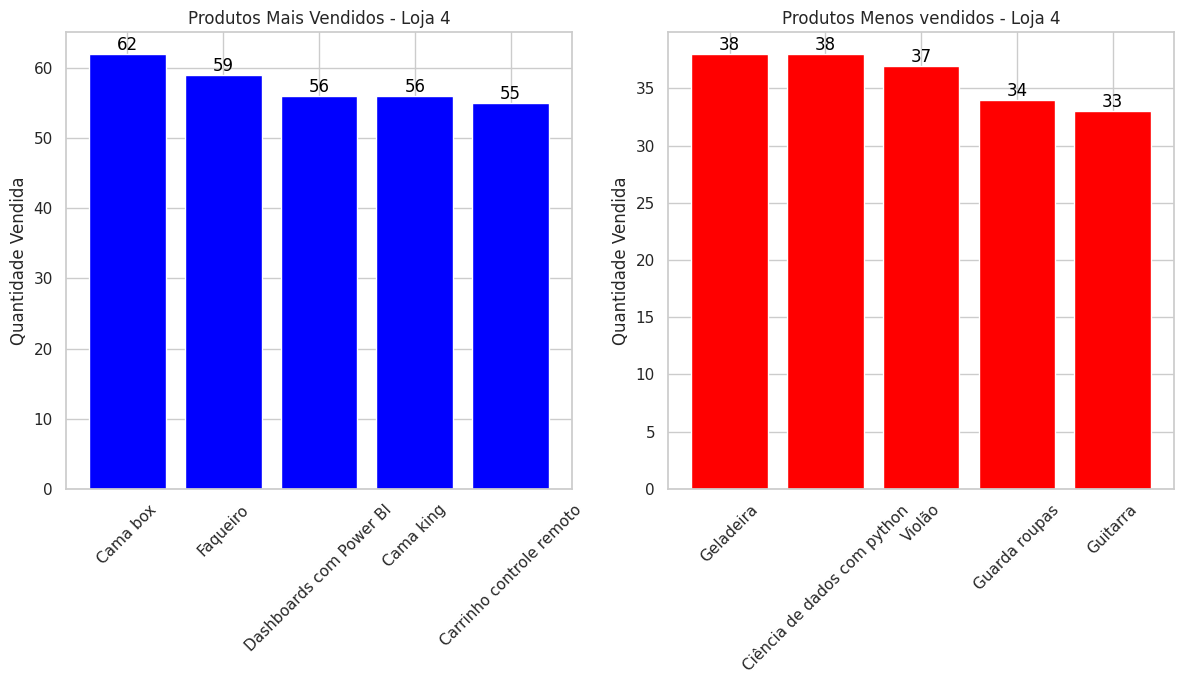

In [337]:
# Define as cores para os gráficos
cores = ['blue', 'red', 'black']

# Função para plotar os 5 produtos mais e os 5 menos vendidos
def produtos_mais_menos_vendidos(df, loja):
    contagem_produtos = df['Produto'].value_counts()

    top_mais = contagem_produtos.head(5)
    top_menos = contagem_produtos.tail(5)

    # Criação de uma figura com gráficos lado a lado
    fig, axes = plt.subplots(1, 2, figsize=(12, 7))

    # Gráfico 1
    bars1 = axes[0].bar(top_mais.index, top_mais.values, color=cores[0])
    axes[0].set_title(f'Produtos Mais Vendidos - {loja}')
    axes[0].set_ylabel('Quantidade Vendida')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].bar_label(bars1, label_type='edge', color=cores[2])

    # Gráfico 2
    bars2 = axes[1].bar(top_menos.index, top_menos.values, color=cores[1])
    axes[1].set_title(f'Produtos Menos vendidos - {loja}')
    axes[1].set_ylabel('Quantidade Vendida')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].bar_label(bars2, label_type='edge', color=cores[2])

    plt.tight_layout()
    plt.show()


# Aplicando para cada loja
produtos_mais_menos_vendidos(loja, "Loja 1")
produtos_mais_menos_vendidos(loja2, "Loja 2")
produtos_mais_menos_vendidos(loja3, "Loja 3")
produtos_mais_menos_vendidos(loja4, "Loja 4")

# 5. Frete Médio por Loja


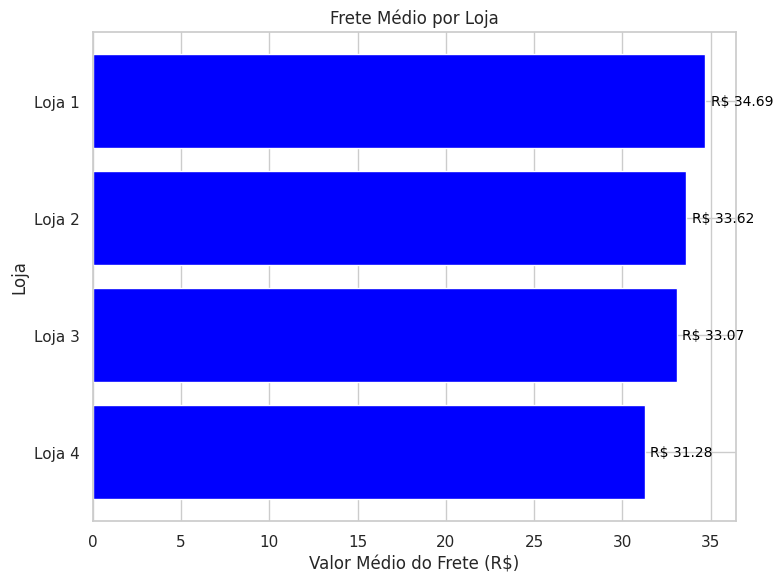

In [336]:
# Calcular o frete médio por loja
frete_medio = {
    'Loja 1': loja['Frete'].mean(),
    'Loja 2': loja2['Frete'].mean(),
    'Loja 3': loja3['Frete'].mean(),
    'Loja 4': loja4['Frete'].mean()
}

# Ordenar o dicionário por valor (frete médio) do menor para o maior
frete_medio_ordenado = dict(sorted(frete_medio.items(), key=lambda item: item[1]))


# Plotar gráfico
plt.figure(figsize=(8, 6))
barras = plt.barh(list(frete_medio_ordenado.keys()), list(frete_medio_ordenado.values()), color=cores[0])
plt.title('Frete Médio por Loja')
plt.xlabel('Valor Médio do Frete (R$)')
plt.ylabel('Loja')

# Adicionando os valores na extremidade de cada barra
for bar in barras:
    xval = bar.get_width()
    plt.text(xval + 0.3, bar.get_y() + bar.get_height()/2.0, f'R$ {xval:.2f}', va='center', ha='left', fontsize=10, color=cores[2])


plt.tight_layout()
plt.show()